# Random Forests

In [1]:
# importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing random forest libraries

from sklearn.ensemble import RandomForestClassifier

In [2]:
# reading in the data
columns = pd.read_csv('data/features2.txt', header = None)

X_train_orig = pd.read_csv('data/Train/X_train.txt', names = columns[0], sep=' ')
X_test_orig = pd.read_csv('data/Test/X_test.txt', names = columns[0], sep=' ')

y_train_orig = pd.read_csv('data/Train/y_train.txt', sep=' ', header = None)
y_test_orig = pd.read_csv('data/Test/y_test.txt', sep=' ', header = None)

In [18]:
my_random_forest = RandomForestClassifier(n_estimators=50)
my_random_forest.fit(X_train_orig, y_train_orig.values.ravel())

RandomForestClassifier(n_estimators=50)

In [11]:
decision_tree_scores = []
for sub_tree in my_random_forest.estimators_:
    decision_tree_scores.append(sub_tree.score(X_train_orig, y_train_orig))
    
print("Performance on fitted data:")
print(f"Average Decision Tree: {np.mean(decision_tree_scores)}")
print(f"Random Forest: {my_random_forest.score(X_train_orig, y_train_orig)}")

Performance on fitted data:
Average Decision Tree: 0.014528131839835201
Random Forest: 1.0


Very Overfit, let's lower estimators

In [17]:
my_random_forest = RandomForestClassifier(n_estimators=20)
my_random_forest.fit(X_train_orig, y_train_orig.values.ravel())

RandomForestClassifier(n_estimators=20)

In [13]:
decision_tree_scores = []
for sub_tree in my_random_forest.estimators_:
    decision_tree_scores.append(sub_tree.score(X_train_orig, y_train_orig))
    
print("Performance on fitted data:")
print(f"Average Decision Tree: {np.mean(decision_tree_scores)}")
print(f"Random Forest: {my_random_forest.score(X_train_orig, y_train_orig)}")

Performance on fitted data:
Average Decision Tree: 0.014136732329084589
Random Forest: 0.9996137504828119


1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

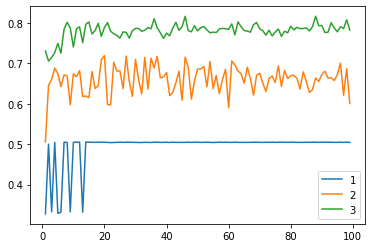

In [20]:
from sklearn.ensemble import RandomForestClassifier

plt.figure()

for max_depth in np.arange(1, 4):

    scores = list()
    
    for n_est in np.arange(1, 100):
        print(n_est, end=' ')

        # Instantiate
        rf = RandomForestClassifier(n_estimators=n_est, max_depth=max_depth)

        # Fit 
        rf.fit(X_train_orig, y_train_orig.values.ravel())

        # Calculate score and append
        scores.append(rf.score(X_test_orig, y_test_orig.values.ravel()))
        
    plt.plot(np.arange(1, 100), scores, label=max_depth)
    
plt.legend()
plt.show()